In [1]:
import os

In [2]:
data_dir = 'C:\\Users\\hp\\Documents\\tensorflow\\cell_images'

In [3]:
os.listdir(data_dir)   

['Parasitized', 'Uninfected']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib.image import imread # to visualise the image 

In [6]:
# to get location of one image
os.listdir(data_dir+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [7]:
para_cell = data_dir + '\\parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png' # entire filepath to a single image.

In [8]:
imread(para_cell)# outputs the array form of image from the directory specified
# imread(para_cell).shape = (148,142,3)
# our image data is already scaled so we'll not rescale it in imagegenerator of tf otherwise rescale=1/255

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

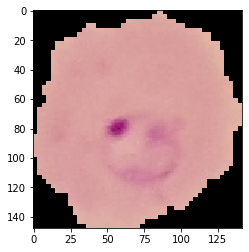

In [9]:
plt.imshow(imread(para_cell)) # an infected cell

In [10]:
os.listdir(data_dir + '\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [11]:
uninfected_cell = data_dir + "\\uninfected" + "\\C100P61ThinF_IMG_20150918_144104_cell_128.png"  

In [12]:
uninfected_cell = imread(uninfected_cell)

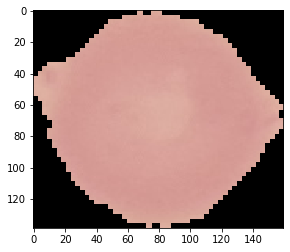

In [13]:
plt.imshow(uninfected_cell) # an uninfected cell

In [14]:
len(os.listdir(data_dir + '\\parasitized')) # no. of examples of infected cell

13780

In [15]:
len(os.listdir(data_dir + '\\uninfected')) # no. of examples of uninfected cell

13780

In [16]:
# actually from real world images they are not necessarily of same shape so we will find average shape of image and reshape all
# other images to that avg shape later in tf imagedatagenerator

In [17]:
# this is discrepency in data
for item in os.listdir(data_dir + '\\uninfected'):
    if item[0] == 'T':
        print(item)

Thumbs.db


In [18]:
dim1 = []
dim2 = []

for image_filname in os.listdir(data_dir + '\\uninfected'):
    if image_filname[0] != 'T':
        img = imread(data_dir + '\\uninfected\\' + image_filname)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

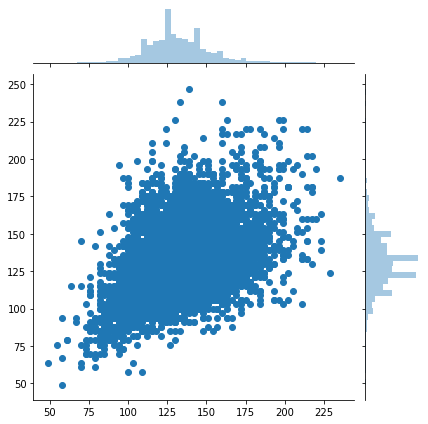

In [28]:
# distribution of variable sizes of images
sns.jointplot(dim1,dim2)

In [20]:
height = int(np.average(dim1))
height

131

In [21]:
width = int(np.average(dim2))
width

131

In [29]:
img_shape = (130,130,3)                                                                                                 

In [30]:
130*130*3 # for such huge faetures we'll form batches of our training set

50700

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # this specifies the constraints of image transformation and augmentation.

In [33]:
# help(ImageDataGenerator)               

In [87]:
image_gen = ImageDataGenerator(validation_split=0.2) #rotation_range=20,      |model could be trained on this also 
                                                     #width_shift_range=0.1,  |
                                                     #height_shift_range=0.1, |
                                                     #shear_range=0.1,        |
                                                     #zoom_range=0.1,
                                                     #horizontal_flip=True,
                                                     #fill_mode='nearest',
                        
                        #validation split is done to create train test split but iff we have two separate directories for both 
                        #then there is no need for it and we can create two train_image_gen and test_image_gen separately,
                        
                        # such image augmentation should only be applied to train set not test set.

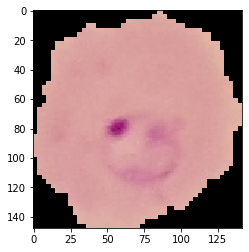

In [88]:
para_img = imread(para_cell)
plt.imshow(para_img)

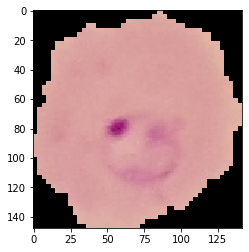

In [89]:
plt.imshow(image_gen.random_transform(para_img)) # creates randomly augmented version of actual img and these transformations
                                                 # can help us create lot many images from existing dataset if we are short off with data availability.

In [90]:
batch_size=16 # genarally order of 2

In [91]:
# for creating train and test sets that is returning (x,y) that is image along with labels.
train_image_gen = image_gen.flow_from_directory(directory= data_dir,
                                               target_size=img_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               subset='training')

Found 22048 images belonging to 2 classes.


In [92]:
test_image_gen = image_gen.flow_from_directory(directory= data_dir,
                                               target_size=img_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               subset='validation',
                                              shuffle=False)

Found 5510 images belonging to 2 classes.


In [93]:
train_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [94]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters

In [95]:
from tensorflow.keras.models import Sequential

In [96]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [102]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 62, 62, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 64)       

In [104]:
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [106]:
results = model.fit_generator(generator=train_image_gen,steps_per_epoch=len(train_image_gen),
                             epochs=20,validation_data=test_image_gen,validation_steps=len(test_image_gen),
                             callbacks=[early_stop])

Epoch 1/20
1378/1378 [==============================] - 224s 163ms/step - loss: 1.2966 - acc: 0.5710 - val_loss: 0.6899 - val_acc: 0.5354
Epoch 2/20
1378/1378 [==============================] - 209s 152ms/step - loss: 0.6816 - acc: 0.5684 - val_loss: 0.6863 - val_acc: 0.5541
Epoch 3/20
1378/1378 [==============================] - 217s 157ms/step - loss: 0.6657 - acc: 0.6020 - val_loss: 0.6163 - val_acc: 0.6517
Epoch 4/20
1378/1378 [==============================] - 207s 150ms/step - loss: 0.2902 - acc: 0.9012 - val_loss: 0.2566 - val_acc: 0.9327
Epoch 5/20
1378/1378 [==============================] - 209s 152ms/step - loss: 0.1905 - acc: 0.9439 - val_loss: 0.1991 - val_acc: 0.9437
Epoch 6/20
1378/1378 [==============================] - 224s 163ms/step - loss: 0.1721 - acc: 0.9482 - val_loss: 0.1836 - val_acc: 0.9352
Epoch 7/20
1378/1378 [==============================] - 273s 198ms/step - loss: 0.1660 - acc: 0.9502 - val_loss: 0.2121 - val_acc: 0.9350
Epoch 8/20
1378/1378 [============

In [107]:
model.evaluate_generator(test_image_gen)  

[0.17701574459628108, 0.93430126]

In [108]:
model.evaluate_generator(train_image_gen)

[0.12536280628912833, 0.95677614]

In [109]:
# great!!

In [110]:
metrics = pd.DataFrame(model.history.history)

In [111]:
metrics

,loss,acc,val_loss,val_acc
0,1.296641,0.570982,0.689854,0.535390
1,0.681615,0.568396,0.686322,0.554083
2,0.665692,0.601959,0.616329,0.651724
3,0.290175,0.901170,0.256580,0.932668
4,0.190538,0.943941,0.199139,0.943739
5,0.172094,0.948249,0.183553,0.935209
6,0.166003,0.950200,0.212108,0.935027
7,0.157236,0.952195,0.172437,0.940290
8,0.152734,0.952876,0.171118,0.941016
9,0.144456,0.954327,0.168882,0.945554


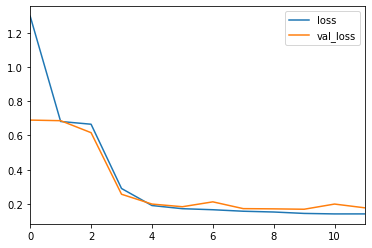

In [112]:
metrics[['loss','val_loss']].plot()

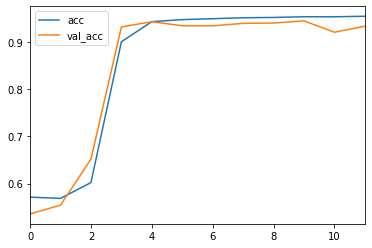

In [113]:
metrics[['acc','val_acc']].plot()

In [114]:
pred = model.predict_generator(test_image_gen)

In [116]:
pred # actually returns the probabilities that whether it belongs to class 1 or not

array([[3.0383468e-03],
       [1.0432303e-03],
       [8.9406967e-08],
       ...,
       [9.2976999e-01],
       [9.4499266e-01],
       [9.7939646e-01]], dtype=float32)

In [117]:
predictions = pred>0.5 # really important could be varied to get a better precision and recall tradeoff

In [120]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [121]:
from sklearn.metrics import confusion_matrix,classification_report

In [129]:
test_image_gen.classes # y_test

array([0, 0, 0, ..., 1, 1, 1])

In [130]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2755
           1       0.90      0.97      0.94      2755

    accuracy                           0.93      5510
   macro avg       0.94      0.93      0.93      5510
weighted avg       0.94      0.93      0.93      5510



In [131]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[2467  288]
 [  74 2681]]


In [132]:
# let's predict on a single image

In [133]:
from tensorflow.keras.preprocessing import image

In [139]:
my_img = image.load_img(para_cell,target_size=img_shape) # could also reshape to shape accepted by our model

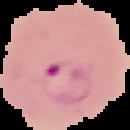

In [140]:
my_img

In [142]:
my_img_array = image.img_to_array(my_img)

In [144]:
my_img_array.shape

(130, 130, 3)

In [146]:
my_img_array = my_img_array.reshape(1,130,130,3)

In [147]:
my_img_array.shape

(1, 130, 130, 3)

In [152]:
int(model.predict(my_img_array)>0.5) # 0 is parasitized and it actually is infected

0

In [153]:
train_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [154]:
model.save('cell_inf_check.h5')